In [1]:
from preamble import *

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import pickle

# 예시 데이터 (X는 독립 변수, y는 종속 변수)
X = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])  # 예시 독립 변수
y = np.array([14.5, 16.4095, 18.7499, 21.2168, 23.5968, 26.0003, 28.1447, 29.9357, 31.3496, 32.1426])  # 예시 종속 변수

# 데이터 모양을 (n_samples, n_features) 형태로 변환
X = X.reshape(-1, 1)  # X는 2D 배열이어야 함

n_iterations = 50
best_model = None
best_poly = None
best_r2_score = -float('inf')  # 최소값으로 초기화

# 고차 항을 추가하기 위해 PolynomialFeatures 사용
for i in range(n_iterations):
  # degree = np.random.randint(1, 6)
  degree = 3  # 다항식의 차수
  poly = PolynomialFeatures(degree)

  X_poly = poly.fit_transform(X)

  # 모델 학습
  model = LinearRegression()
  model.fit(X_poly, y)

  # 회귀선 예측
  y_pred = model.predict(X_poly)

  # a1 = model.coef_[1]  # 기울기
  # a2 = model.coef_[2]  # 기울기
  # a3 = model.coef_[3]  # 기울기
  # a4 = model.coef_[4]  # 기울기
  # b = model.intercept_  # 절편

  # print(f"회귀 계수 (기울기): {a1, a2, a3, a4}")
  # print(f"절편: {model.intercept_}")

  r2 = r2_score(y, y_pred)
  print(f"Iteration {i+1}, Degree {degree}, R^2 Score: {r2}")

  # 가장 높은 R^2 점수를 가진 모델 저장
  if r2 > best_r2_score:
    best_r2_score = r2
    best_model = model
    best_poly = poly

with open('best_polynomial_regression_model.pkl', 'wb') as f:
  pickle.dump((best_model, best_poly), f)

print(f"최고 R^2 점수: {best_r2_score}")

Iteration 1, Degree 3, R^2 Score: 0.9999749707307666
Iteration 2, Degree 3, R^2 Score: 0.9999749707307666
Iteration 3, Degree 3, R^2 Score: 0.9999749707307666
Iteration 4, Degree 3, R^2 Score: 0.9999749707307666
Iteration 5, Degree 3, R^2 Score: 0.9999749707307666
Iteration 6, Degree 3, R^2 Score: 0.9999749707307666
Iteration 7, Degree 3, R^2 Score: 0.9999749707307666
Iteration 8, Degree 3, R^2 Score: 0.9999749707307666
Iteration 9, Degree 3, R^2 Score: 0.9999749707307666
Iteration 10, Degree 3, R^2 Score: 0.9999749707307666
Iteration 11, Degree 3, R^2 Score: 0.9999749707307666
Iteration 12, Degree 3, R^2 Score: 0.9999749707307666
Iteration 13, Degree 3, R^2 Score: 0.9999749707307666
Iteration 14, Degree 3, R^2 Score: 0.9999749707307666
Iteration 15, Degree 3, R^2 Score: 0.9999749707307666
Iteration 16, Degree 3, R^2 Score: 0.9999749707307666
Iteration 17, Degree 3, R^2 Score: 0.9999749707307666
Iteration 18, Degree 3, R^2 Score: 0.9999749707307666
Iteration 19, Degree 3, R^2 Score: 0.

In [3]:
with open('best_polynomial_regression_model.pkl', 'rb') as f:
  model, poly = pickle.load(f)

In [4]:
model.coef_

array([ 0.   ,  0.365,  0.008, -0.   ])

In [6]:
  a1 = model.coef_[1]  # 기울기
  a2 = model.coef_[2]  # 기울기
  a3 = model.coef_[3]  # 기울기
  # a4 = model.coef_[4]  # 기울기
  # a5 = model.coef_[5]  # 기울기
  b = model.intercept_  # 절편

  print(f"회귀 계수 (기울기): {a1, a2, a3}")
  print(f"절편: {model.intercept_}")

NameError: name 'a4' is not defined

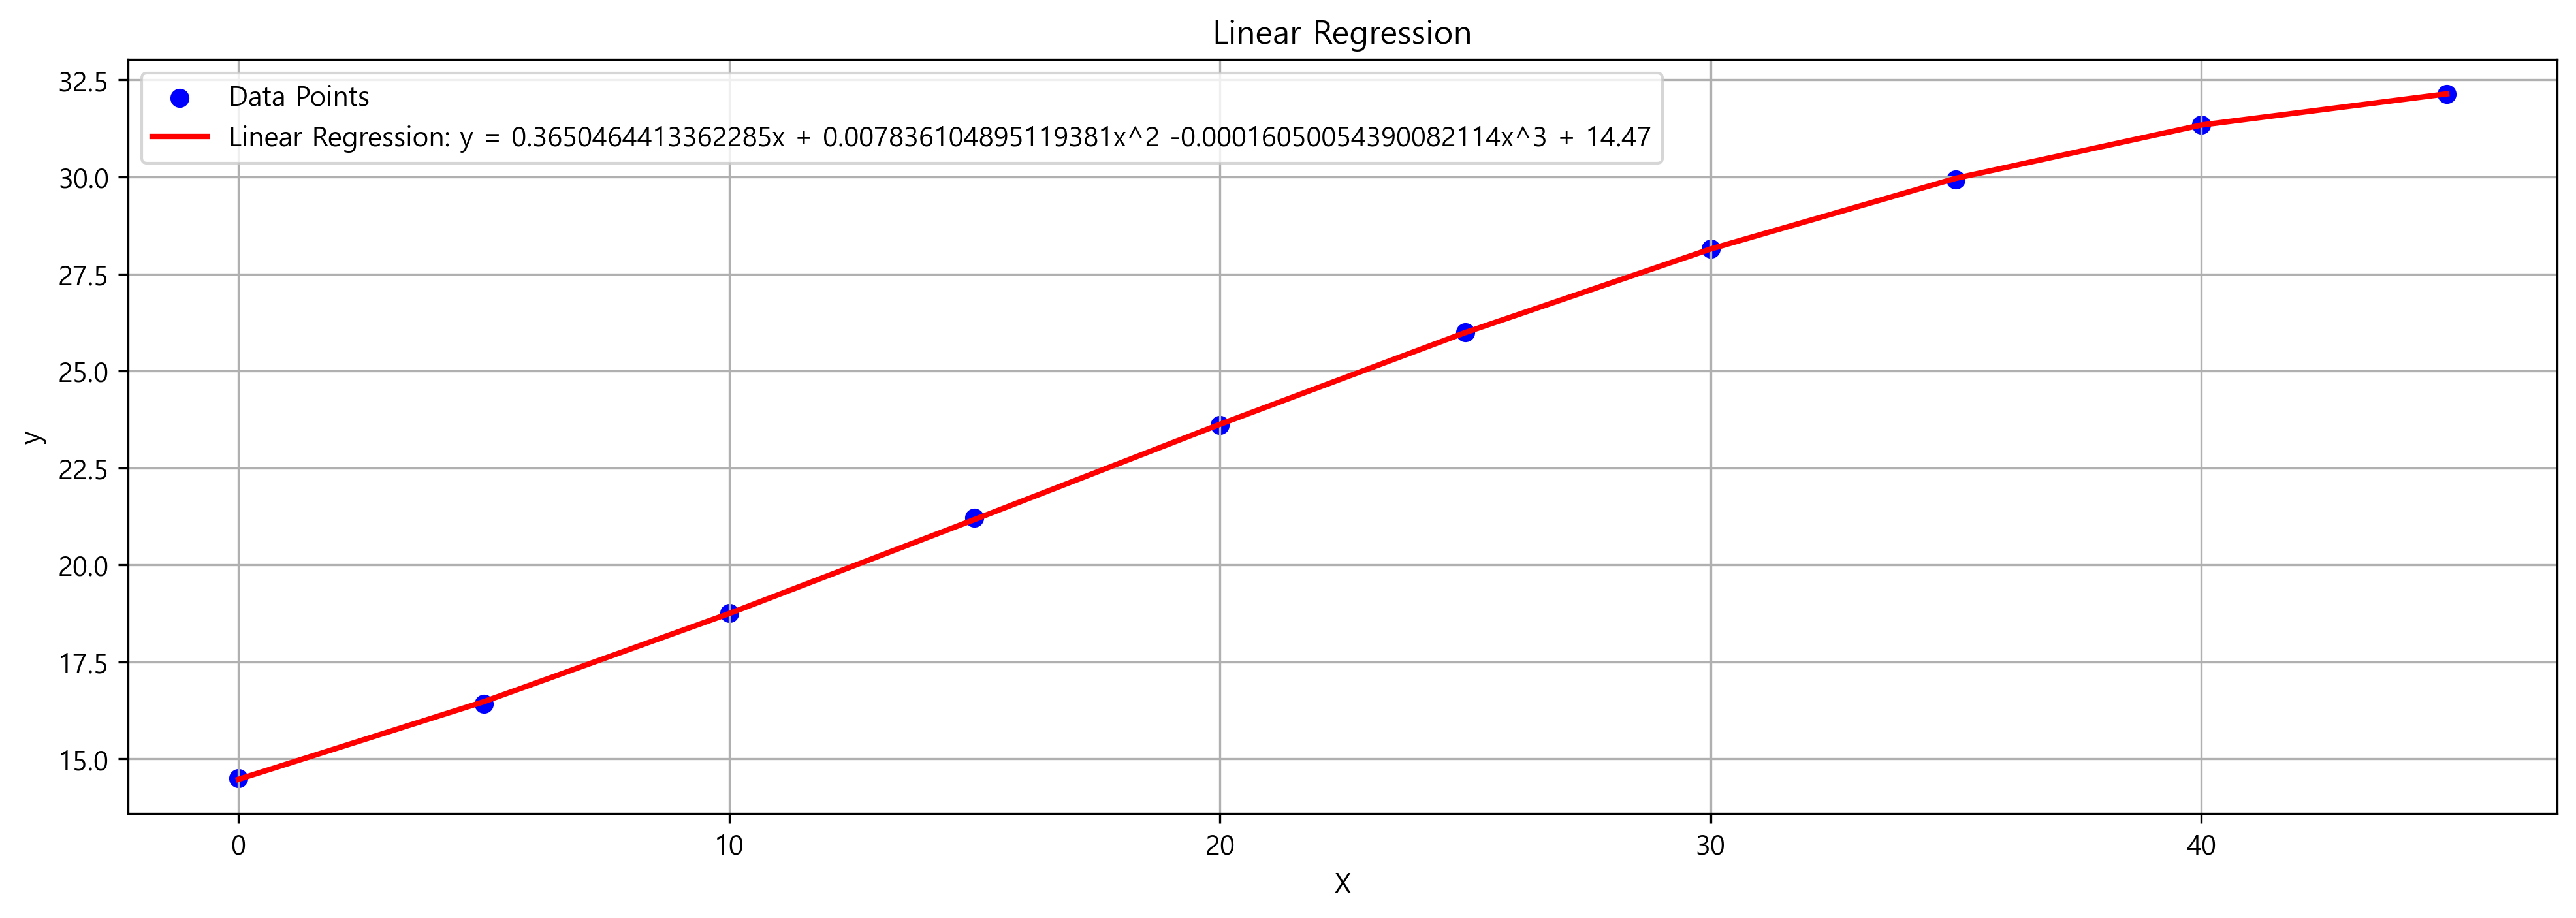

In [7]:
# 그래프 그리기
plt.figure(figsize=(16, 5))
plt.scatter(X, y, color='blue', label='Data Points')  # 데이터 포인트
plt.plot(X, y_pred, color='red', label=f'Linear Regression: y = {a1}x + {a2}x^2 {a3}x^3 + {b:.2f}')  # 회귀선
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
model.predict(poly.fit_transform(np.array([[20]])))

array([23.622])